### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH  (UPDATED 20220326 to do the Rapid React)
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [ ]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from pathlib import Path
from importlib import reload

In [ ]:
import telemetry_plot_utils as tpu 

In [ ]:
robot_dir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot')
reload(tpu)
print(f'tpu.robot_dir is {tpu.robot_dir}')
tpu.set_path(robot_dir)

tpu.robot_dir is None
tpu.robot_dir is C:\Cory\CJH Shared\Python\FRC\2024\robot


### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [ ]:
path_weaver_files = data_files = tpu.get_paths()
path_weaver_files

['C:\\Cory\\CJH Shared\\Python\\FRC\\2024\\robot\\pathweaver\\paths\\three_points']

In [ ]:
df_points = tpu.get_points_df(name='balls')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,2.1,-4.7,0.50,0.0,True,False,NaN
1,4.1,-4.7,0.25,0.0,True,False,NaN
2,4.1,-6.7,0.05,0.0,True,False,NaN
3,4.1,-1.0,0.75,0.0,True,False,NaN
4,2.1,-6.7,0.75,0.0,True,False,NaN


#### trick to get all four bounce paths in one point list

In [ ]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

""


#### trick to get multiple paths in one point list

In [ ]:
traversal = ['hub_to_ball', 'two_ball_traversal', 'terminal_to_shot']
dfs = []
for traversal_file in traversal:
    dfs.append(tpu.get_points_df(name=traversal_file))
df_traversal_points = pd.concat(dfs)
df_traversal_points

""


#### generate all point paths into one dictionary

In [ ]:
names = [Path(f).name for f in path_weaver_files]
point_dfs = {}
for f in names:
    point_dfs.update({f:tpu.get_points_df(name=f, x_shift=0, y_shift=0)})
point_dfs.keys()

dict_keys(['three_points'])

In [ ]:
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
df_data.columns

Index(['TIME', 'RBT_X', 'RBT_Y', 'RBT_TH', 'TRAJ_X', 'TRAJ_Y', 'TRAJ_TH',
       'TRAJ_VEL', 'DELTA', 'VEC_X', 'VEC_Y'],
      dtype='object')

In [ ]:
df_data.head()

,TIME,RBT_X,RBT_Y,RBT_TH,TRAJ_X,TRAJ_Y,TRAJ_TH,TRAJ_VEL,DELTA,VEC_X,VEC_Y
0,0.179625,2.143043,4.699655,4.332079e-18,2.148393,4.699313,-0.018068,0.538875,0.152890,0.152890,3.092686e-18
1,0.379892,2.295793,4.693115,2.022814e-17,2.305570,4.692247,-0.070375,0.913068,0.152890,0.152890,3.092686e-18
2,0.579243,2.479494,4.676051,3.447300e-17,2.488801,4.674792,-0.117202,0.934306,0.184491,0.184491,6.359966e-18
3,0.779231,2.666849,4.650990,5.084877e-17,2.676356,4.649389,-0.149373,0.959256,0.189024,0.189024,9.611656e-18
4,0.979916,2.858801,4.620433,6.625369e-17,2.869341,4.618496,-0.164844,0.989706,0.194369,0.194369,1.287763e-17


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

In [ ]:
pix_per_m =  16.4 / 1711
left_offset =  66 * pix_per_m
right_offset =  79 * pix_per_m
(left_offset, right_offset)

(0.6326125073056692, 0.757218001168907)

In [ ]:
pix_per_m =  8.23 / 865
top_offset =  43 * pix_per_m
bottom_offset =  42 * pix_per_m
(top_offset, bottom_offset)

(0.409121387283237, 0.39960693641618494)

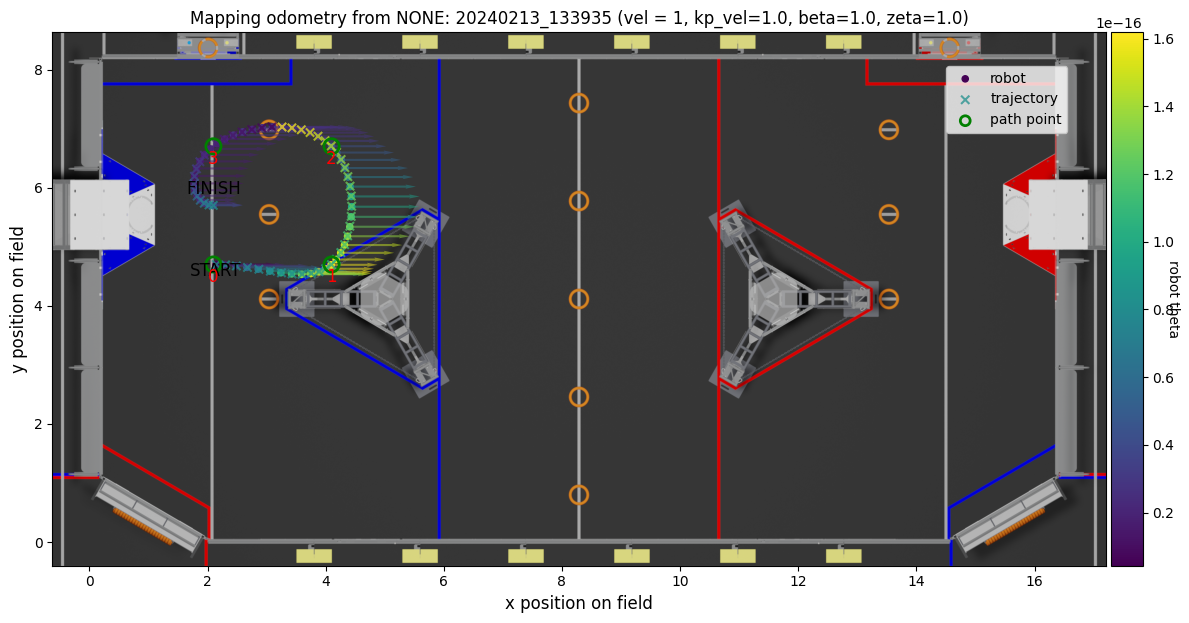

In [ ]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['hub_to_ball'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

In [ ]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['two_ball_traversal'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

IndexError: list index out of range

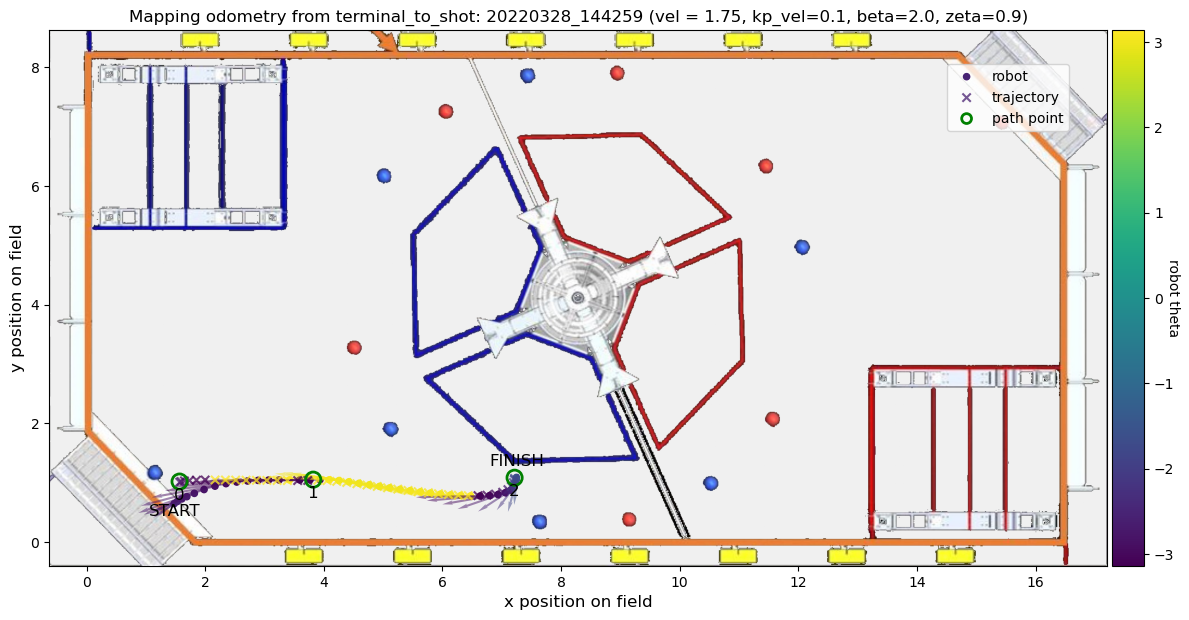

In [201]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['terminal_to_shot'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

### old stuff, don't execute.  2021 stuff is broken in the 2022 version for now

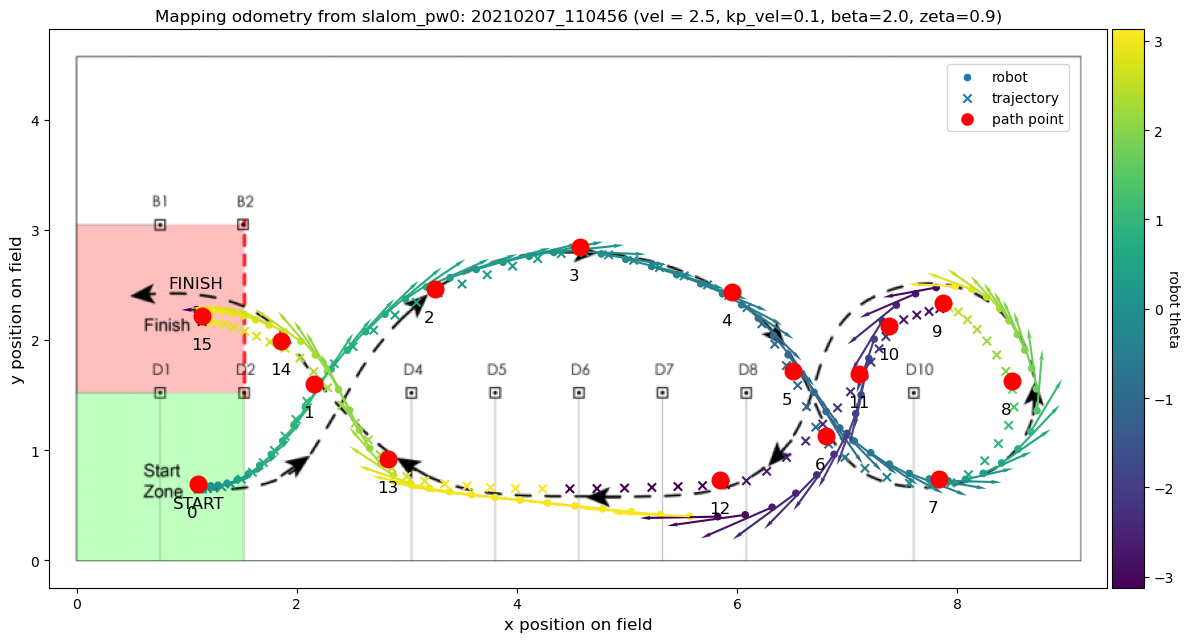

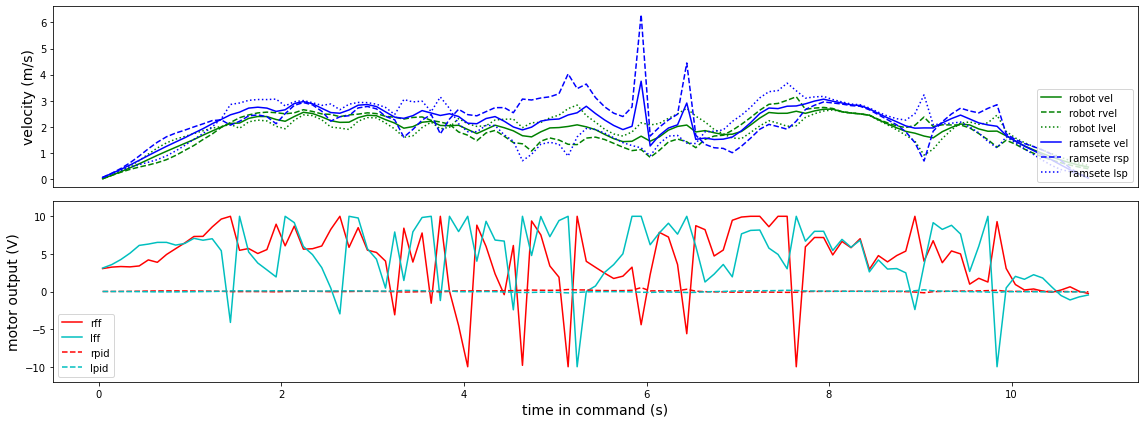

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

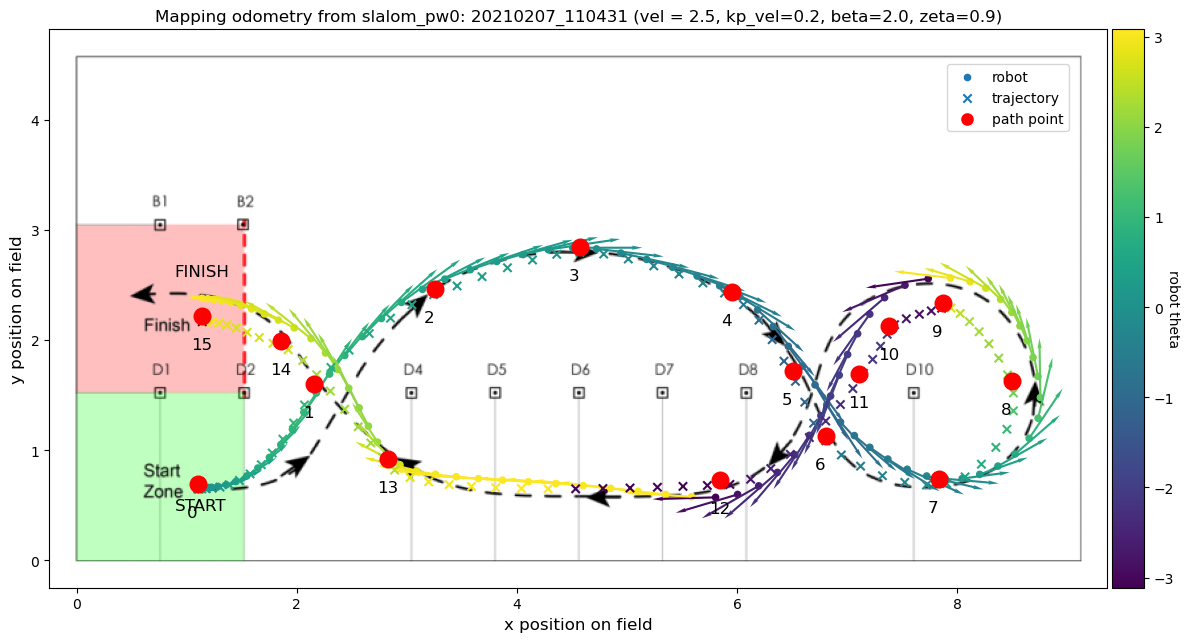

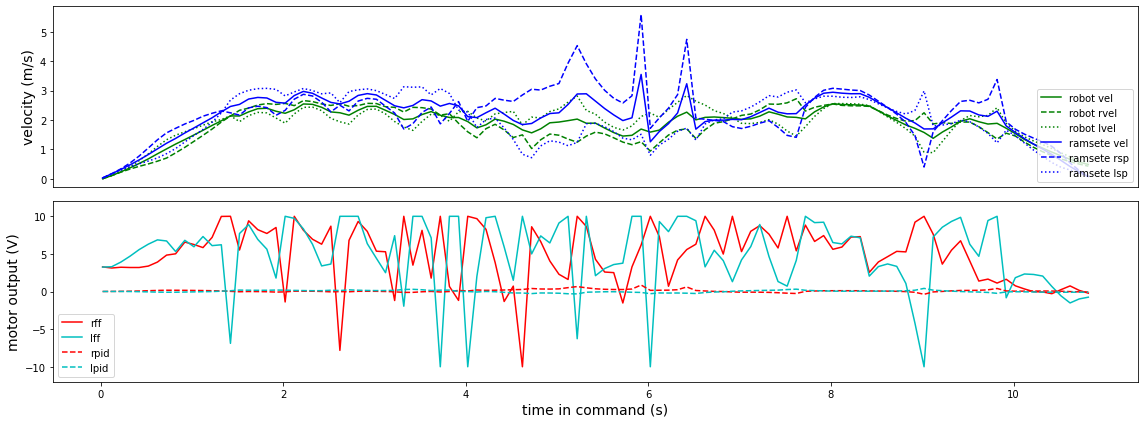

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

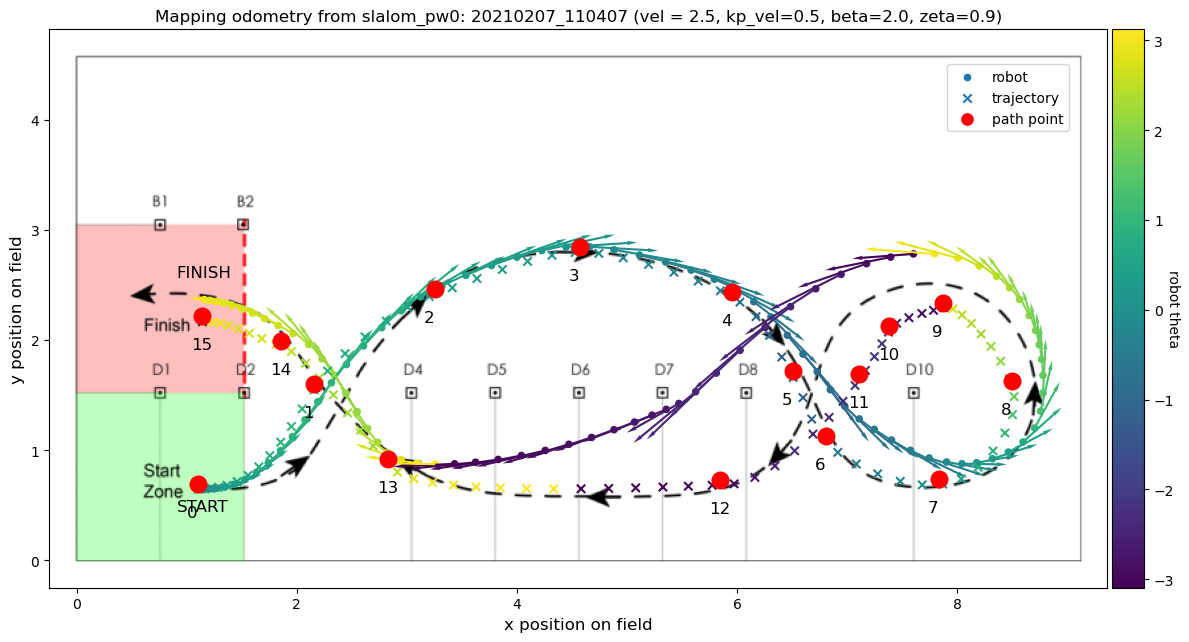

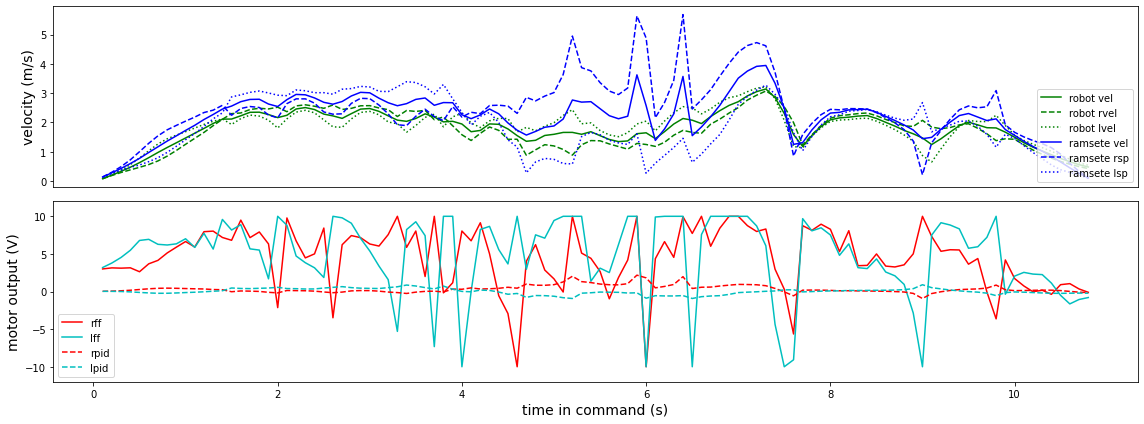

In [64]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-4, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)